# Preliminariy research

## I - Use of the dataset of the Pima Indians Diabetes Database from Kaggle
Source of the dataset: https://www.kaggle.com/uciml/pima-indians-diabetes-database

This dataset consist of medical values such as number of pregancies, glucose level, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function and age. The target is a binary variable that indicates if the patient has diabetes or not.

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_csv('diabetesKaggle.csv')

### 1 - Dataset description

In [197]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [199]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There is a total of 768 observations and 9 variables. The variables are:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) if the patient has diabetes or not

In [200]:
# show missing data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Some data are missing, where the value is 0, but no NaN. We will replace these values with the mean of the column.

### 2 -  Data Preprocessing

In [201]:
# replace 0 data with NaN
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

# show missing data
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [202]:
# replace all NaN data with mean
df.fillna(df.mean(), inplace=True)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data is now clean of missing values. We will now split the dataset into a training set and a test set. We will use the training set to train our model and the test set to evaluate the performance of our model.

### 3 - Visualisation of the data

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

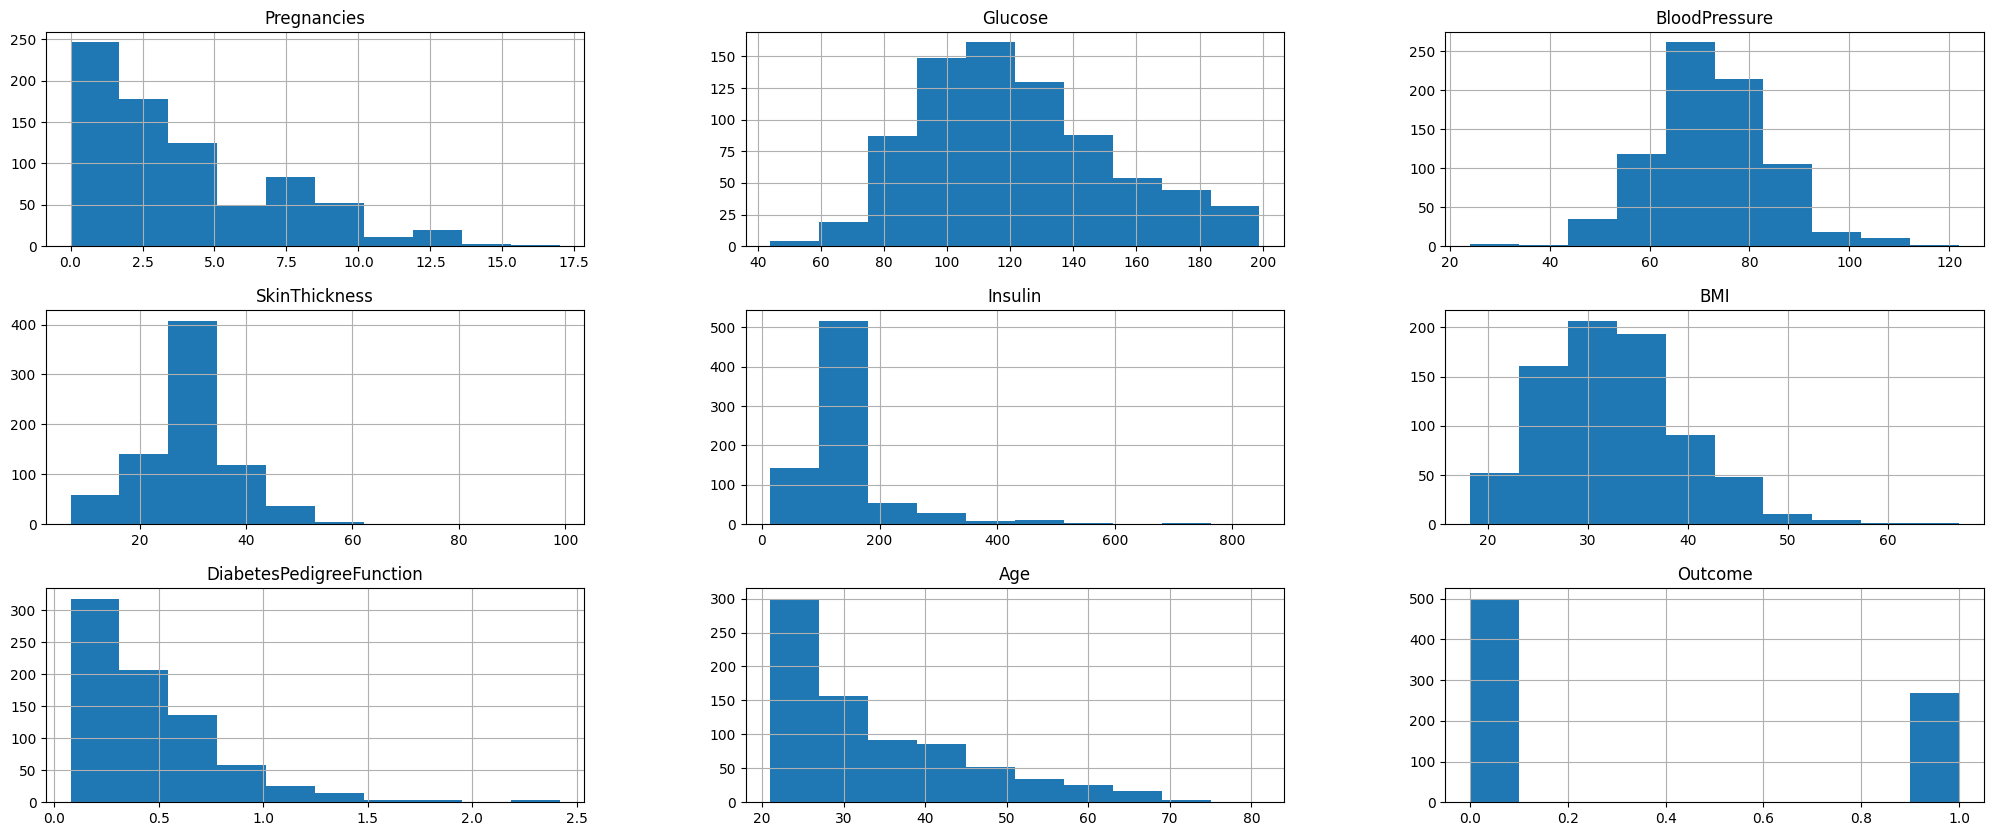

In [203]:
import seaborn as sns
df.hist(figsize=(25,10))

<Axes: >

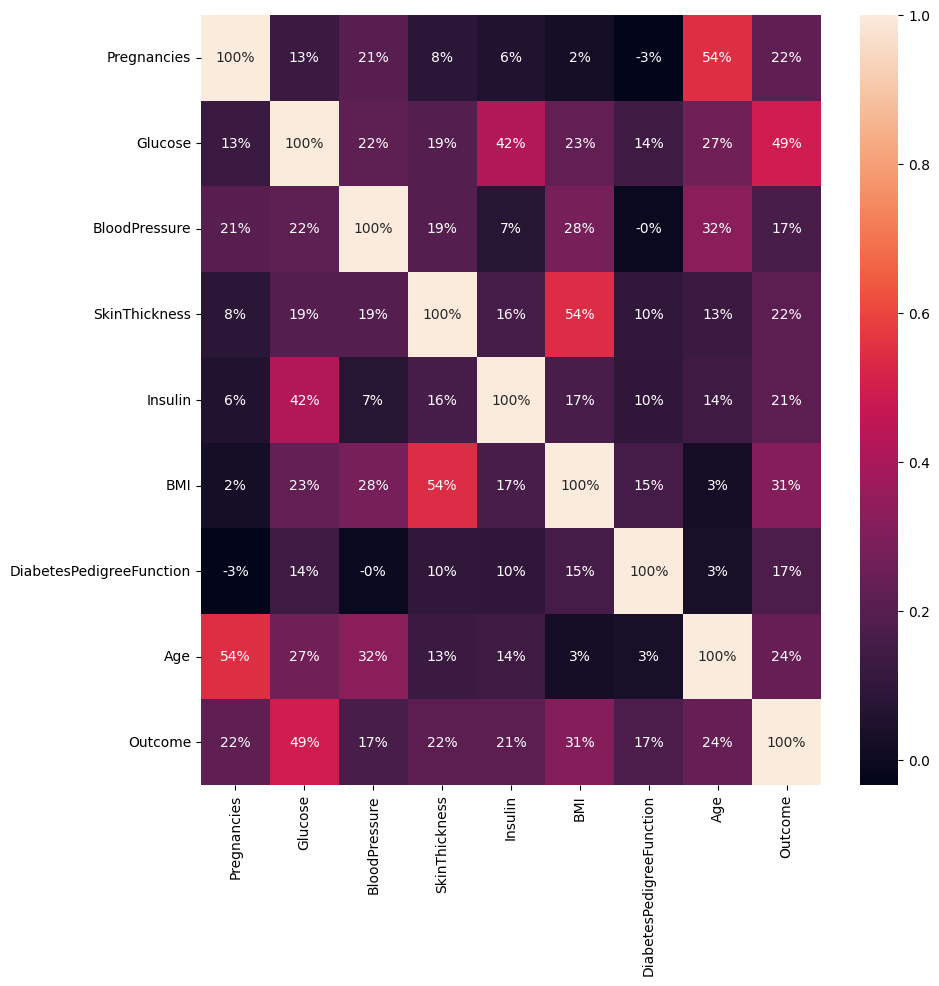

In [233]:
#heat map to show correlation the features and the target
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

From the heatmap, we can see that outcome is correlated with glucose, BMI and age.

### 4 - Data optimisation

#### Split the dataset into a training set and a test set

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Center and scale the data

In [206]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 5 - Test of different models

#### Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)
y_pred_logreg = logmodel.predict(X_test)


#### Decision Tree

In [208]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

#### Random Forest

In [209]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

#### Support Vector Machine

In [210]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#### K-Nearest Neighbors

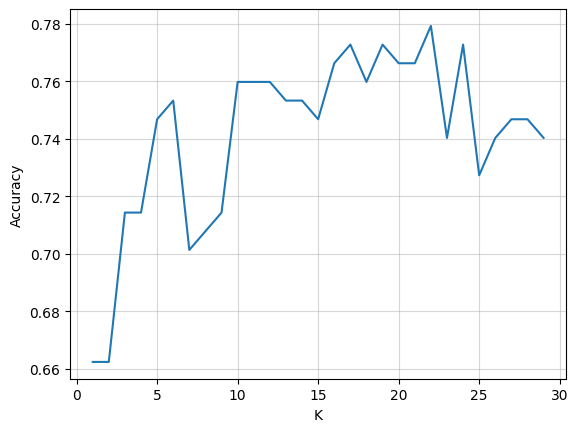

The best k is 22 with accuracy 77.92%


In [211]:
from sklearn.neighbors import KNeighborsClassifier

knn_accuracy_list = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    knn_accuracy_list.append((i, accuracy_score(y_test, y_pred_knn)))

# plot knn_accuracy_list
plt.plot([i[0] for i in knn_accuracy_list], [i[1] for i in knn_accuracy_list])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.5)
plt.show()

# find the best k
knn_accuracy_list.sort(key=lambda x: x[1], reverse=True)
print("The best k is {} with accuracy {:.2f}%".format(knn_accuracy_list[0][0], knn_accuracy_list[0][1]*100))

In [212]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

#### MultiLayer Perceptron

In [220]:
from sklearn.neural_network import MLPClassifier

# remove warings
import warnings
warnings.filterwarnings("ignore")

# test different hidden layer sizes and activation functions to find the best one
mlp_accuracy_dict = {}
for i in ['identity', 'logistic', 'tanh', 'relu']:
    mlp_accuracy_list = []
    for j in range(1, 21):
        mlp = MLPClassifier(hidden_layer_sizes=(j,), activation=i, solver='lbfgs', max_iter=1000, random_state=42)
        mlp.fit(X_train, y_train)
        y_pred_mlp = mlp.predict(X_test)
        mlp_accuracy_list.append((j, accuracy_score(y_test, y_pred_mlp)))
    mlp_accuracy_dict[i] = mlp_accuracy_list

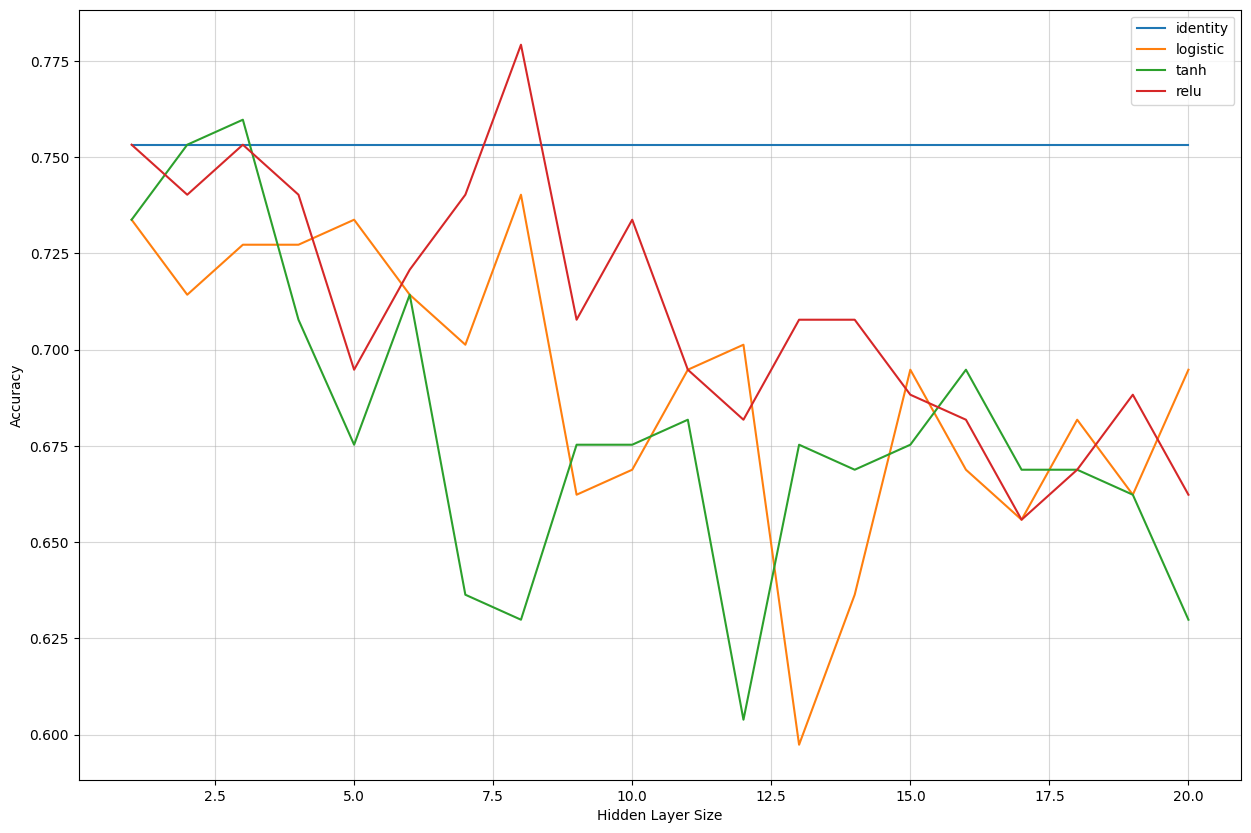

The best hidden layer size is 8 with accuracy 77.92% and activation function is relu


In [221]:
# plot mlp_accuracy_list to find the best one
# and a graph for each activation function
plt.figure(figsize=(15, 10))
for i in mlp_accuracy_dict:
	plt.plot([j[0] for j in mlp_accuracy_dict[i]], [j[1] for j in mlp_accuracy_dict[i]], label=i)
plt.xlabel('Hidden Layer Size')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()

# find the best hidden layer size and activation function for mlp
mlp_accuracy_list = []
for i in mlp_accuracy_dict:
    mlp_accuracy_list += [(i, j[0], j[1]) for j in mlp_accuracy_dict[i]]
mlp_accuracy_list.sort(key=lambda x: x[2], reverse=True)
print("The best hidden layer size is {} with accuracy {:.2f}% and activation function is {}"
    .format(mlp_accuracy_list[0][1], mlp_accuracy_list[0][2]*100, mlp_accuracy_list[0][0]))

In [229]:
mlp = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', solver='lbfgs', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

#### Test accuracy of the models

In [230]:
print('Logistic Regression: {:.2f}%'.format(accuracy_score(y_test, y_pred_logreg)*100))
print('Decision Tree: {:.2f}%'.format(accuracy_score(y_test, y_pred_dtree)*100))
print('Random Forest: {:.2f}%'.format(accuracy_score(y_test, y_pred_rfc)*100))
print('SVC: {:.2f}%'.format(accuracy_score(y_test, y_pred_svm)*100))
print('KNN: {:.2f}%'.format(accuracy_score(y_test, y_pred_knn)*100))
print('MLP: {:.2f}%'.format(accuracy_score(y_test, y_pred_mlp)*100))

Logistic Regression: 75.32%
Decision Tree: 71.43%
Random Forest: 74.68%
SVC: 75.32%
KNN: 77.92%
MLP: 77.92%


#### Test score F1 of the models

In [217]:
from sklearn.metrics import f1_score

print('Logistic Regression: {:.2f}%'.format(f1_score(y_test, y_pred_logreg)*100))
print('Decision Tree: {:.2f}%'.format(f1_score(y_test, y_pred_dtree)*100))
print('Random Forest: {:.2f}%'.format(f1_score(y_test, y_pred_rfc)*100))
print('SVC: {:.2f}%'.format(f1_score(y_test, y_pred_svm)*100))
print('KNN: {:.2f}%'.format(f1_score(y_test, y_pred_knn)*100))
print('MLP: {:.2f}%'.format(f1_score(y_test, y_pred_mlp)*100))

Logistic Regression: 64.15%
Decision Tree: 59.26%
Random Forest: 65.49%
SVC: 62.75%
KNN: 65.31%
MLP: 69.03%
